<a href="https://colab.research.google.com/github/rahiakela/machine-learning-research-and-practice/blob/main/grokking-machine-learning/12-ensemble-learning/01_bagging_model_random_forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Bagging model: Random forest

In this notebook, we see one of the most well-known bagging models: a **random forest**. 

In a random
forest, the weak learners are small decision trees trained on random subsets of the dataset.

Random forests work well for classification and regression problems, and the process is similar.

##Setup

In [ ]:
!wget https://github.com/luisguiserrano/manning/raw/master/Chapter_12_Ensemble_Methods/utils.py

In [2]:
import random

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

import utils

random.seed(0)

In [3]:
import warnings
warnings.simplefilter("ignore", UserWarning)

In [8]:
import six
import sys
sys.modules['sklearn.externals.six'] = six

##Dataset

We use a small dataset of spam and ham emails.

In [4]:
emails = np.array([
  [7,8,1],
  [3,2,0],
  [8,4,1],
  [2,6,0],
  [6,5,1],
  [9,6,1],
  [8,5,0],
  [7,1,0],
  [1,9,1],
  [4,7,0],
  [1,3,0],
  [3,10,1],
  [2,2,1],
  [9,3,0],
  [5,3,0],
  [10,1,0],
  [5,9,1],
  [10,8,1]
])

spam_dataset = pd.DataFrame(emails, columns=["Lottery", "Sale", "Spam"])
spam_dataset

,Lottery,Sale,Spam
0,7,8,1
1,3,2,0
2,8,4,1
3,2,6,0
4,6,5,1
5,9,6,1
6,8,5,0
7,7,1,0
8,1,9,1
9,4,7,0


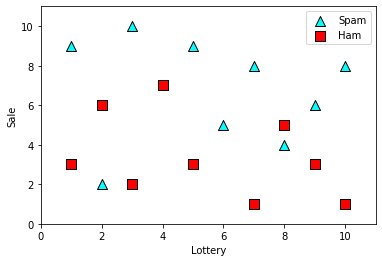

In [5]:
features = spam_dataset[["Lottery", "Sale"]]
labels = spam_dataset["Spam"]

utils.plot_points(features, labels)

##Training decision tree

Before we get into random forests, let’s fit a decision tree classifier to this data and see how
well it performs.

In [6]:
decision_tree_classifier = DecisionTreeClassifier(random_state=0)
decision_tree_classifier.fit(features, labels)
decision_tree_classifier.score(features, labels)

1.0

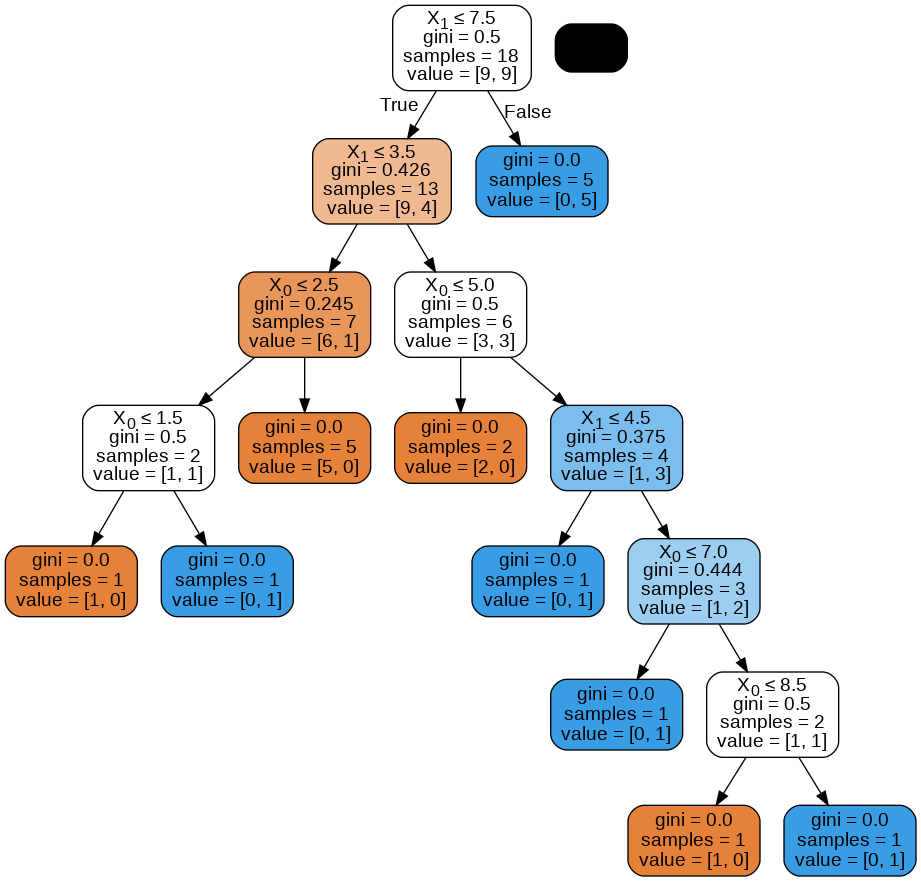

In [9]:
utils.display_tree(decision_tree_classifier)

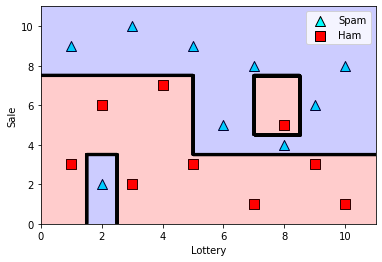

In [10]:
utils.plot_model(features, labels, decision_tree_classifier)

Notice that it fits the dataset very well, with a 100% training accuracy, although it clearly overfits. 

The overfitting can be noticed on the two outliers that the model tries to classify correctly, without
noticing they are outliers.

Let's see how to solve this overfitting problem by fitting a random forest.

##Training  random forest manually

Let's learn how to fit a random forest manually.

In a nutshell, we pick random
subsets from our dataset and train a weak learner (decision tree) on each one of them. Some data
points may belong to several subsets, and others may belong to none. 

The combination of them is our strong learner. The way the strong learner makes predictions is by letting the weak learners
vote.

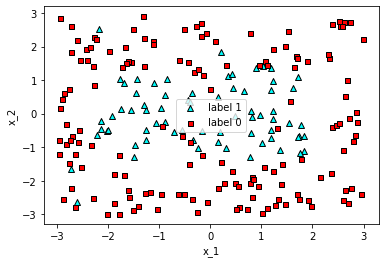

In [ ]:
rows = []

#Adding points
for i in range(200):
  x = 6*random.random()-3
  y = 6*random.random()-3
  z = int(((x-1)**2+y**2 < 2) or ((x+1)**2+y**2 < 2))
  rows.append([x,y,z])

#Adding noise
for i in range(20):
  x = 6*random.random()-3
  y = 6*random.random()-3
  z = random.randint(0,1)
  rows.append([x,y,z])

    
df_two_circles = pd.DataFrame(rows, columns=['x_1', 'x_2', 'y'])

utils.plot_points(df_two_circles[['x_1', 'x_2']], df_two_circles['y'])

In [ ]:
features = np.array(df_two_circles[['x_1', 'x_2']])
labels = np.array(df_two_circles['y'])

Let's try with the gamma parameter for overfitting and underfitting with the RBF kernel.

Gamma = 0.1
Accuracy: 0.8818181818181818


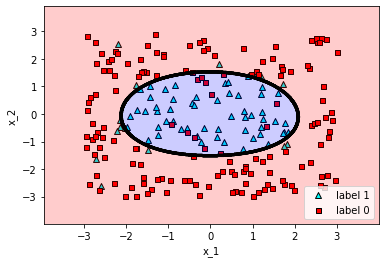

In [ ]:
# gamma = 0.1
svm_gamma_01 = SVC(kernel="rbf", gamma=0.1)
svm_gamma_01.fit(features, labels)

print("Gamma = 0.1")
print(f"Accuracy: {svm_gamma_01.score(features, labels)}")
utils.plot_model(features, labels, svm_gamma_01)

Gamma = 1
Accuracy: 0.9363636363636364


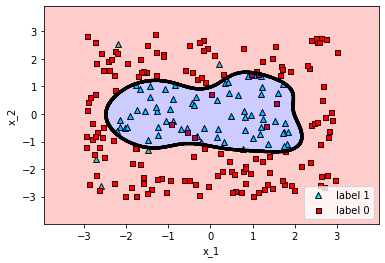

In [ ]:
# gamma = 1
svm_gamma_1 = SVC(kernel="rbf", gamma=1)
svm_gamma_1.fit(features, labels)

print("Gamma = 1")
print(f"Accuracy: {svm_gamma_1.score(features, labels)}")
utils.plot_model(features, labels, svm_gamma_1)

Gamma = 10
Accuracy: 0.9636363636363636


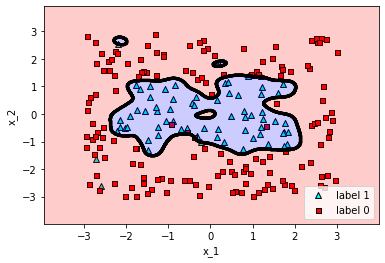

In [ ]:
# gamma = 10
svm_gamma_10 = SVC(kernel="rbf", gamma=10)
svm_gamma_10.fit(features, labels)

print("Gamma = 10")
print(f"Accuracy: {svm_gamma_10.score(features, labels)}")
utils.plot_model(features, labels, svm_gamma_10)

Gamma = 100
Accuracy: 0.9954545454545455


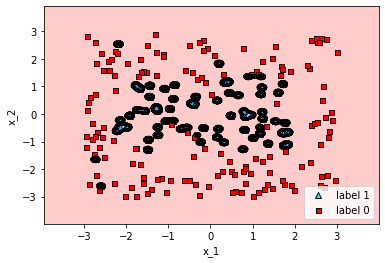

In [ ]:
# gamma = 100
svm_gamma_100 = SVC(kernel="rbf", gamma=100)
svm_gamma_100.fit(features, labels)

print("Gamma = 100")
print(f"Accuracy: {svm_gamma_100.score(features, labels)}")
utils.plot_model(features, labels, svm_gamma_100)

In practice, the wideness of our radial basis functions is something we want to
tune. For this, we use a parameter called the gamma parameter. 

When gamma is small, the surface
formed is very wide, and when it is large, the surface is very narrow.

Notice that for a very small value of gamma, the model overfits, because the curve is too simple, and
it doesn’t classify our data well. 

For a large value of gamma, the model vastly overfits, because it builds
a tiny mountain for each triangle and a tiny valley for each square. This makes it classify almost everything
as a square, except for the areas just around the triangles. 

A medium value of gamma seems to
work well, because it builds a boundary that is simple enough, yet classifies the points correctly.